In [ ]:
import numpy as np
import matplotlib.pyplot as plt


[[3.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         5.        ]
 [3.         0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.58972543
  0.808267   0.93465474 1.02683438 1.10738098 1.18805932 1.27817319
  1.38900457 1.53920161 1.76668403 2.16214483 2.97635908 5.        ]
 [3.         0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.45063499
  0.70868826 0.90351813 1.06530246 1.21463092 1.36668383 1.53562955
  1.73864407 2.00111836 2.36539007 2.90553645 3.74329157 5.        ]
 [3.         0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.4041267
  0.67233362 0.90542794 1.11622744 1.31915753 1.52841663 1.75901819
  2.02882474 2.36123846

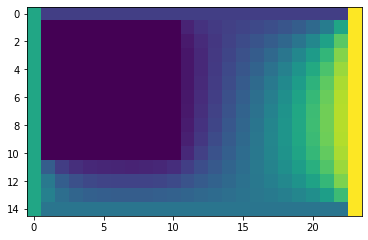

In [50]:
def calculate_potential(grid, conductor_mask, epsilon=1e-6, max_iterations=10000):
    height, width = grid.shape
    prev_grid = np.copy(grid)
    # Get the indices of the masked elements
    masked_indices = np.where(conductor_mask)
    # Get the indices of the points immediately outside the mask
    outside_indices = (masked_indices[0] - 1, masked_indices[1])
    # Get the values of the points immediately outside the mask
    outside_values = grid[outside_indices]

    for iteration in range(max_iterations):
        for i in range(1, height - 1):
            for j in range(1, width - 1):
                if not conductor_mask[i, j]:
                    grid[i, j] = (grid[i-1, j] + grid[i+1, j] + grid[i, j-1] + grid[i, j+1]) / 4
                else:
                    # Calculate the mean of the outside values
                    mean = np.mean(outside_values)
                    grid[i, j] = mean 

        # Check convergence
        if np.max(np.abs(grid - prev_grid)) < epsilon:
            break

        prev_grid = np.copy(grid)

    return grid



[[3.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         5.        ]
 [3.         0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.58972543
  0.808267   0.93465474 1.02683438 1.10738098 1.18805932 1.27817319
  1.38900457 1.53920161 1.76668403 2.16214483 2.97635908 5.        ]
 [3.         0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.45063499
  0.70868826 0.90351813 1.06530246 1.21463092 1.36668383 1.53562955
  1.73864407 2.00111836 2.36539007 2.90553645 3.74329157 5.        ]
 [3.         0.1        0.1        0.1        0.1        0.1
  0.1        0.1        0.1        0.1        0.1        0.4041267
  0.67233362 0.90542794 1.11622744 1.31915753 1.52841663 1.75901819
  2.02882474 2.36123846

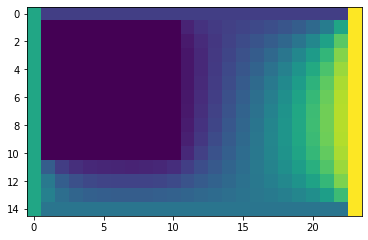

In [51]:
# Define the grid size
height, width = 15, 24

# Create the grid
grid = np.zeros((height, width))

# Create the conductor mask
conductor_mask = np.zeros((height, width), dtype=bool)

# Define the conductor's position and size
conductor_x = 1  # Starting x-coordinate of the conductor
conductor_y = 1  # Starting y-coordinate of the conductor
conductor_width = 10  # Width of the conductor
conductor_height = 10  # Height of the conductor

# Set the conductor mask
conductor_mask[conductor_y:conductor_y+conductor_height, conductor_x:conductor_x+conductor_width] = True

# Set the initial potential of the grid points
front_up = 1
front_dw = 2
front_r = 5
front_l = 3
grid.fill(0)
grid[0].fill(front_up)
grid[-1].fill(front_dw)
grid[:,0].fill(front_l)
grid[:,-1].fill(front_r)

# Calculate the electrostatic potential
result = calculate_potential(grid, conductor_mask)

# Print the result
plt.imshow(grid)
print(grid)